In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.9/208.9 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:


In [ ]:
!pip install wordcloud
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 9.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import spacy
import re
import os
import scipy
import unicodedata
import contractions
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datasets
from textblob import TextBlob
from copy import deepcopy
from datetime import datetime
%matplotlib inline

In [ ]:
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Data Science Project/Grocery.csv')

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Data Science Project/Handmade_Products.csv')

In [ ]:
data = datasets.load_dataset('McAuley-Lab/Amazon-Reviews-2023', 'raw_review_All_Beauty')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

The repository for McAuley-Lab/Amazon-Reviews-2023 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/McAuley-Lab/Amazon-Reviews-2023.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


All_Beauty.jsonl:   0%|          | 0.00/327M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

In [ ]:
df3 = data['full'].to_pandas()

In [ ]:
data1 = datasets.load_dataset('McAuley-Lab/Amazon-Reviews-2023', 'raw_review_Baby_Products')

Baby_Products.jsonl:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

In [ ]:
df4 = data1['full'].to_pandas()

In [ ]:
reviews_df = pd.concat([df1, df2, df3, df4], axis=0)

In [ ]:
len(reviews_df)

21713094

In [ ]:
reviews_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Excellent! Yummy!,Excellent!! Yummy! Great with other foods and...,[],B00CM36GAQ,B00CM36GAQ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-04-25 22:41:22.395,0,True
1,5.0,Delicious!!! Yum!,Excellent! The best! I use it with my beef a...,[],B074J5WVYH,B0759B7KLH,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-04-25 22:40:00.380,0,True
2,5.0,"Extremely Delicious, but expensive imo",These are very tasty. They are extremely soft ...,[],B079TRNVHX,B079TRNVHX,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-04-25 22:20:24.527,1,True
3,5.0,Delicious!,My favorite!,[],B07194LN2Z,B07194LN2Z,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-10 05:41:59.614,0,True
4,5.0,Great taste,Great for making brownies and crinkle cookies.,[],B005CD4196,B005CD4196,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-10 05:41:34.965,7,True


In [ ]:
reviews_df  = reviews_df.drop('images',axis=1)

In [ ]:
reviews_df.head()

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Excellent! Yummy!,Excellent!! Yummy! Great with other foods and...,B00CM36GAQ,B00CM36GAQ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-04-25 22:41:22.395,0,True
1,5.0,Delicious!!! Yum!,Excellent! The best! I use it with my beef a...,B074J5WVYH,B0759B7KLH,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-04-25 22:40:00.380,0,True
2,5.0,"Extremely Delicious, but expensive imo",These are very tasty. They are extremely soft ...,B079TRNVHX,B079TRNVHX,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-04-25 22:20:24.527,1,True
3,5.0,Delicious!,My favorite!,B07194LN2Z,B07194LN2Z,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-10 05:41:59.614,0,True
4,5.0,Great taste,Great for making brownies and crinkle cookies.,B005CD4196,B005CD4196,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-10 05:41:34.965,7,True


In [ ]:
reviews_df.isnull().sum()

,0
rating,0
title,3670
text,4512
asin,0
parent_asin,0
user_id,0
timestamp,0
helpful_vote,0
verified_purchase,0


In [ ]:
reviews_df.dropna(inplace=True)

In [ ]:
reviews_df.isnull().sum()

,0
rating,0
title,0
text,0
asin,0
parent_asin,0
user_id,0
timestamp,0
helpful_vote,0
verified_purchase,0


In [ ]:
df = deepcopy(reviews_df)

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
sia = SentimentIntensityAnalyzer()

In [ ]:
def remove_html(text):
    return re.sub(r'<.*?>', '', text)

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def handle_negations(text):
    text = re.sub(r"\b(not|no|never)\b", "not_", text)
    return text

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def standardize_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = remove_html(text)
    text = remove_urls(text)
    text = handle_negations(text)
    text = remove_numbers(text)
    text = remove_special_chars(text)
    text = standardize_whitespace(text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)
print("Processed Text Sample:\n", df['processed_text'].head())

Processed Text Sample:
 0               excellent yummy great food great alone
1    excellent best use beef broccoli throw chicken...
2    tasty extremely soft literally melt tongue sea...
3                                             favorite
4                   great making brownie crinkle cooky
Name: processed_text, dtype: object


In [ ]:
df.to_csv('/content/drive/MyDrive/Data Science Project/Checkpoint 1.csv', index=False)

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['processed_text'].apply(get_sentiment)

In [ ]:
df.to_csv('/content/drive/MyDrive/Data Science Project/Checkpoint 2.csv', index=False)

In [ ]:
chunks = []
for chunk in pd.read_csv('/content/drive/MyDrive/Data Science Project/Checkpoint 2.csv', chunksize=10000):
  chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)
df.head()

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,processed_text,sentiment
0,5.0,Excellent! Yummy!,Excellent!! Yummy! Great with other foods and...,B00CM36GAQ,B00CM36GAQ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-04-25 22:41:22.395,0,True,excellent yummy great food great alone,Positive
1,5.0,Delicious!!! Yum!,Excellent! The best! I use it with my beef a...,B074J5WVYH,B0759B7KLH,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-04-25 22:40:00.380,0,True,excellent best use beef broccoli throw chicken...,Positive
2,5.0,"Extremely Delicious, but expensive imo",These are very tasty. They are extremely soft ...,B079TRNVHX,B079TRNVHX,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-04-25 22:20:24.527,1,True,tasty extremely soft literally melt tongue sea...,Positive
3,5.0,Delicious!,My favorite!,B07194LN2Z,B07194LN2Z,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-10 05:41:59.614,0,True,favorite,Positive
4,5.0,Great taste,Great for making brownies and crinkle cookies.,B005CD4196,B005CD4196,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-10 05:41:34.965,7,True,great making brownie crinkle cooky,Positive


In [ ]:
df.isna().sum()

,0
rating,0
title,1106
text,1828
asin,0
parent_asin,0
user_id,0
timestamp,0
helpful_vote,0
verified_purchase,0
processed_text,63968


In [ ]:
len(df)

21706438

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
rating,0
title,0
text,0
asin,0
parent_asin,0
user_id,0
timestamp,0
helpful_vote,0
verified_purchase,0
processed_text,0


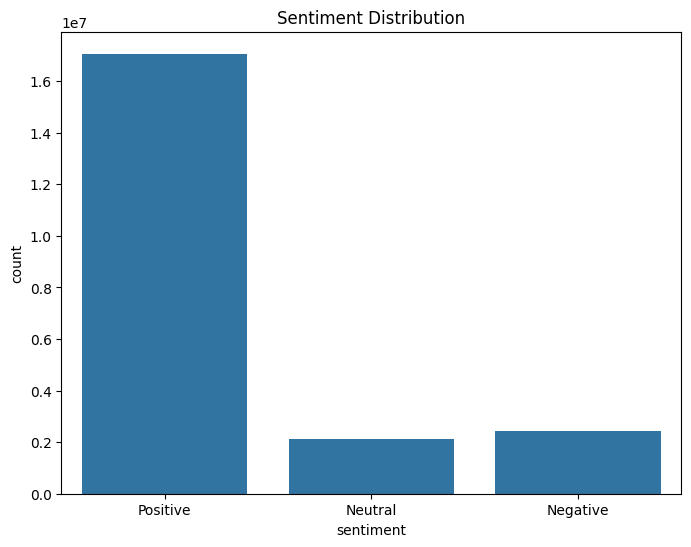

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

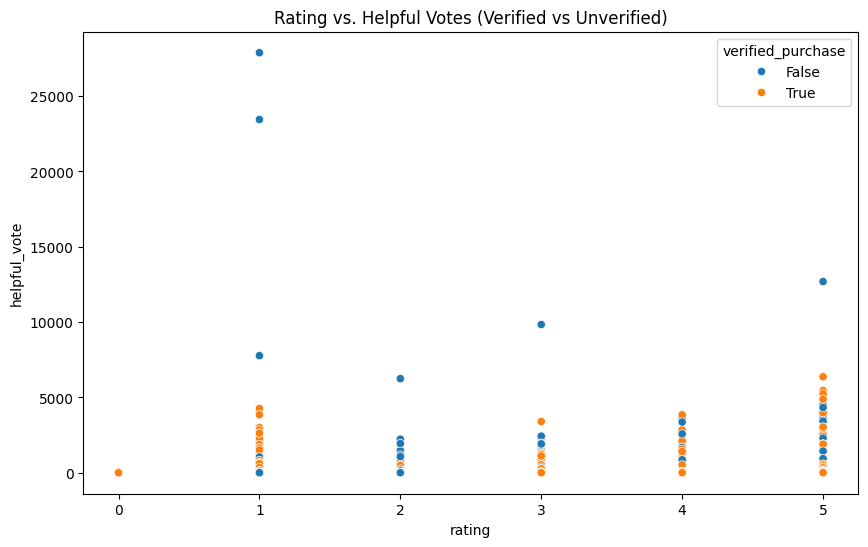

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='helpful_vote', data=df, hue='verified_purchase')
plt.title('Rating vs. Helpful Votes (Verified vs Unverified)')
plt.show()

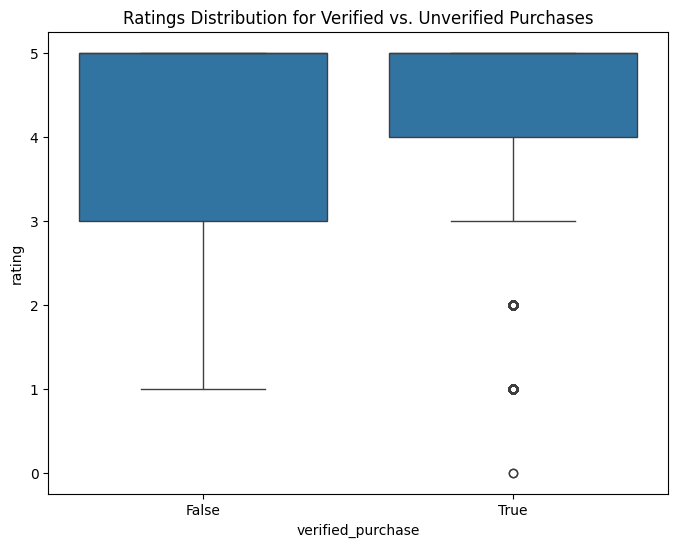

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='verified_purchase', y='rating', data=df)
plt.title('Ratings Distribution for Verified vs. Unverified Purchases')
plt.show()

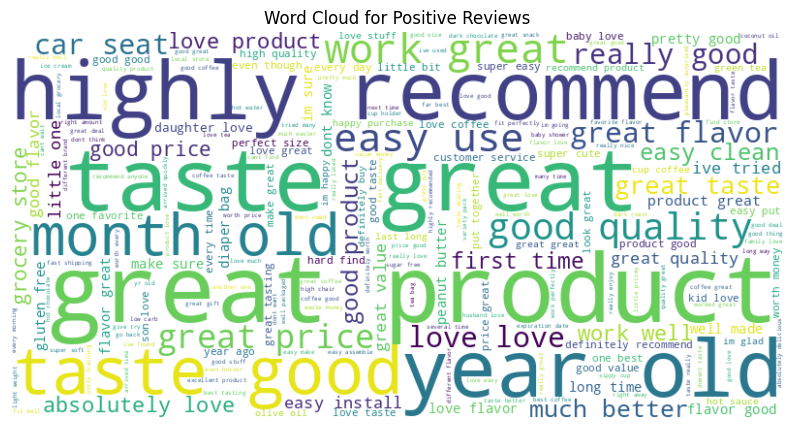

In [ ]:
positive_text = ' '.join(df[df['sentiment'] == 'Positive']['processed_text'])

plt.figure(figsize=(10, 6))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

In [ ]:
del positive_text
del wordcloud_pos

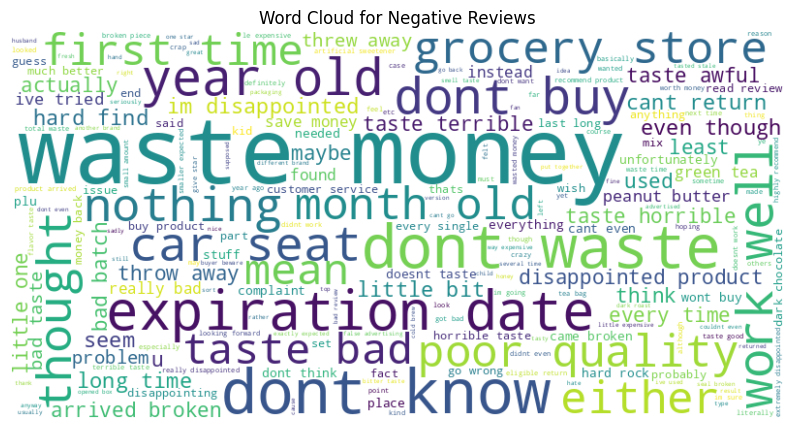

In [ ]:
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['processed_text'])

plt.figure(figsize=(10, 6))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


In [ ]:
del negative_text
del wordcloud_neg

In [ ]:
df[df['sentiment'] == 'Neutral'].iloc[35,:]

,395
rating,5.0
title,Get it
text,Yummy
asin,B079TRNVHX
parent_asin,B079TRNVHX
user_id,AHCV2CNCOCG6WECDROOUYPDZIFEQ
timestamp,2020-05-26 09:25:02.443
helpful_vote,0
verified_purchase,True
processed_text,yummy


In [ ]:
len(df)

21640855

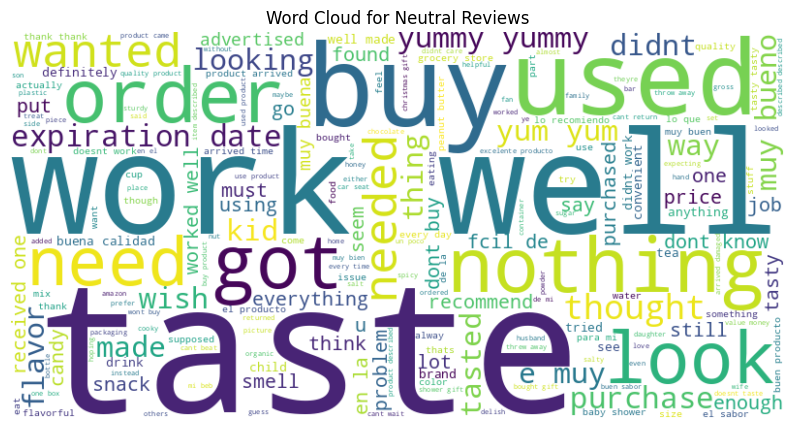

In [ ]:
neutral_text = ' '.join(df[df['sentiment'] == 'Neutral']['processed_text'])

plt.figure(figsize=(10, 6))
wordcloud_neu = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Reviews')
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/Data Science Project/Checkpoint 3.csv', index=False)

In [ ]:
chunks = []
for chunk in pd.read_csv('/content/drive/MyDrive/Data Science Project/Checkpoint 3.csv', chunksize=10000):
  chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)
df.head()

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,processed_text,sentiment
0,5.0,Excellent! Yummy!,Excellent!! Yummy! Great with other foods and...,B00CM36GAQ,B00CM36GAQ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-04-25 22:41:22.395,0,True,excellent yummy great food great alone,Positive
1,5.0,Delicious!!! Yum!,Excellent! The best! I use it with my beef a...,B074J5WVYH,B0759B7KLH,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-04-25 22:40:00.380,0,True,excellent best use beef broccoli throw chicken...,Positive
2,5.0,"Extremely Delicious, but expensive imo",These are very tasty. They are extremely soft ...,B079TRNVHX,B079TRNVHX,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-04-25 22:20:24.527,1,True,tasty extremely soft literally melt tongue sea...,Positive
3,5.0,Delicious!,My favorite!,B07194LN2Z,B07194LN2Z,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-10 05:41:59.614,0,True,favorite,Positive
4,5.0,Great taste,Great for making brownies and crinkle cookies.,B005CD4196,B005CD4196,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-10 05:41:34.965,7,True,great making brownie crinkle cooky,Positive


In [ ]:
df.iloc[14930122]

,14930122
rating,5.0
title,Such a lovely scent but not overpowering.
text,This spray is really nice. It smells really go...
asin,B00YQ6X8EO
parent_asin,B00YQ6X8EO
user_id,AGKHLEW2SOWHNMFQIJGBECAF7INQ
timestamp,1588687728923
helpful_vote,0
verified_purchase,True
processed_text,spray really nice smell really good go really ...


In [ ]:
df.iloc[14930122,6]

'1588687728923'

In [ ]:
type(df.iloc[14930122,6])

str

In [ ]:
timestamp_ms = int(df.iloc[14930122,6])
dt = datetime.fromtimestamp(timestamp_ms / 1000.0)

In [ ]:
formatted_date = dt.strftime("%Y-%m-%d %H:%M:%S.%f")
df.iloc[14930122,6] = formatted_date

In [ ]:
timestamp_ms = int(df.iloc[14930123,6])
dt = datetime.fromtimestamp(timestamp_ms / 1000.0)
formatted_date = dt.strftime("%Y-%m-%d %H:%M:%S.%f")
df.iloc[14930123,6] = formatted_date

In [ ]:
# arr = df.iloc[14930124:21640855,6].values.tolist()
# for i in range(len(arr)):
#   dt = datetime.fromtimestamp(int(arr[i]) / 1000.0)
#   formatted_date = dt.strftime("%Y-%m-%d %H:%M:%S.%f")
#   df.iloc[i+14930124,6] = formatted_date


timestamps = df.iloc[14930124:21640855, 6]
df.iloc[14930124:21640855, 6] = pd.to_datetime(timestamps, unit='ms').dt.strftime("%Y-%m-%d %H:%M:%S.%f")

<ipython-input-15-c53c4c05be40>:9: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df.iloc[14930124:21640855, 6] = pd.to_datetime(timestamps, unit='ms').dt.strftime("%Y-%m-%d %H:%M:%S.%f")


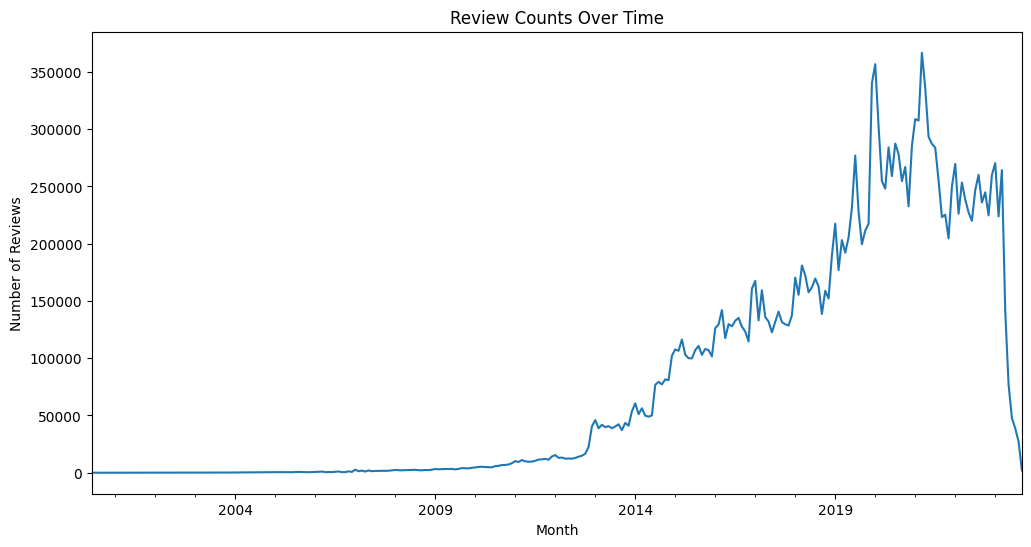

In [ ]:
# def convert_timestamp(x):
#     # Check if x is numeric (in milliseconds) or already a date string
#     if isinstance(x, (int, float)) or x.isdigit():
#         return pd.to_datetime(int(x), unit='ms')
#     else:
#         return pd.to_datetime(x)

# df['timestamp'] = df['timestamp'].apply(convert_timestamp)
# df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')


df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.to_period('M')

plt.figure(figsize=(12, 6))
df.groupby('month').size().plot(kind='line')
plt.title('Review Counts Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
df['polarity'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df['text_length'] = df['processed_text'].apply(len)

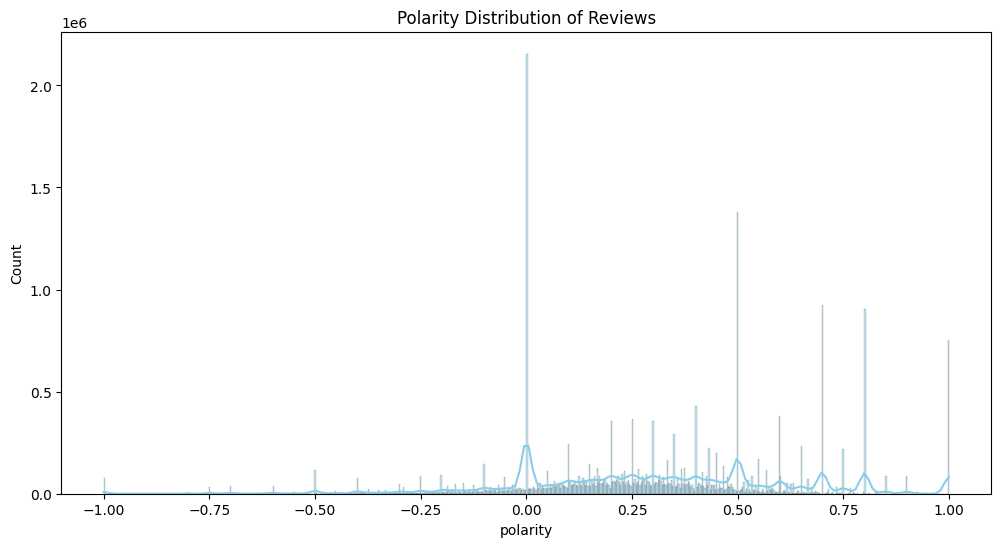

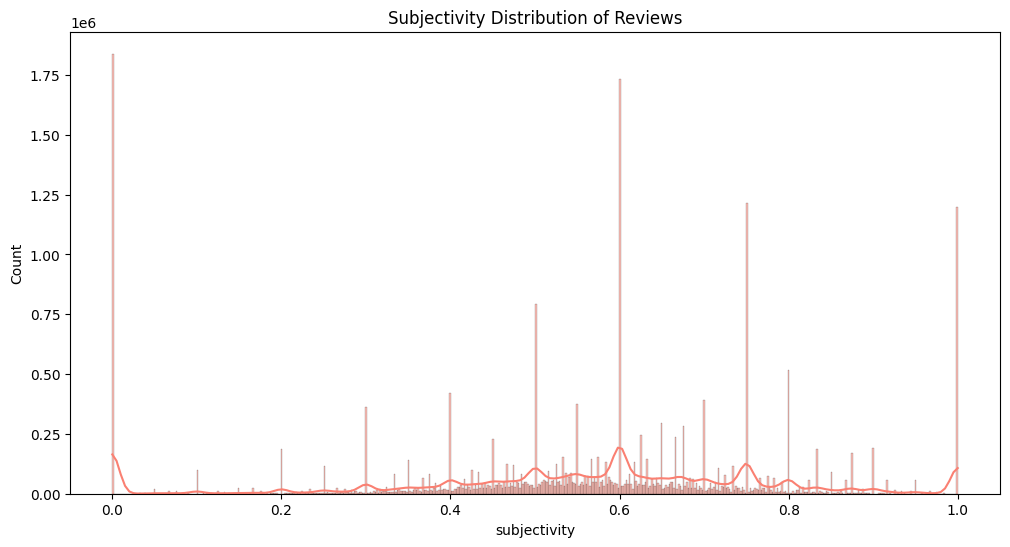

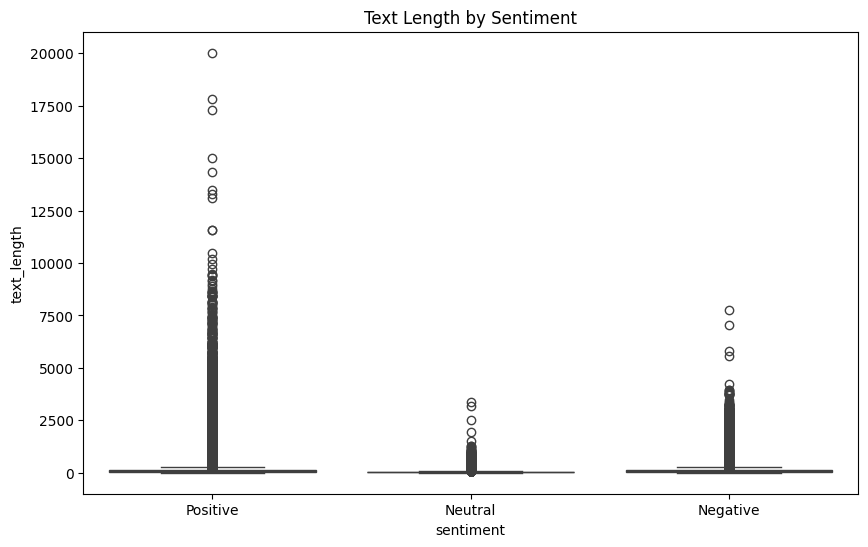

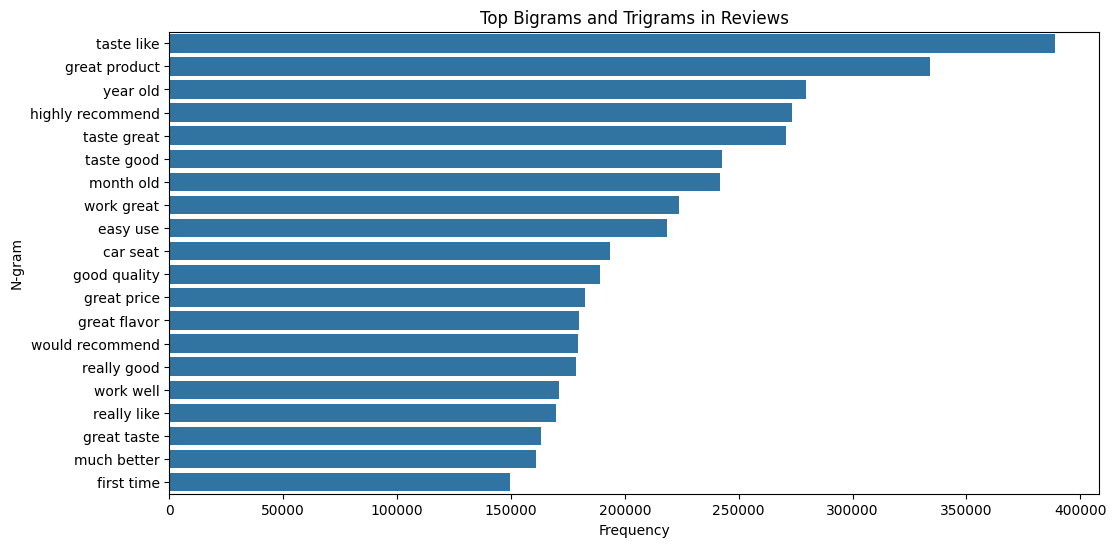

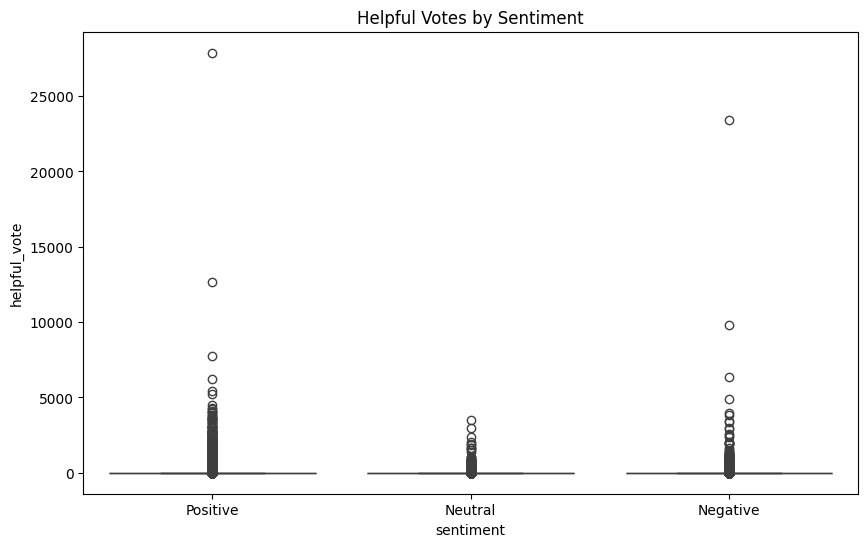

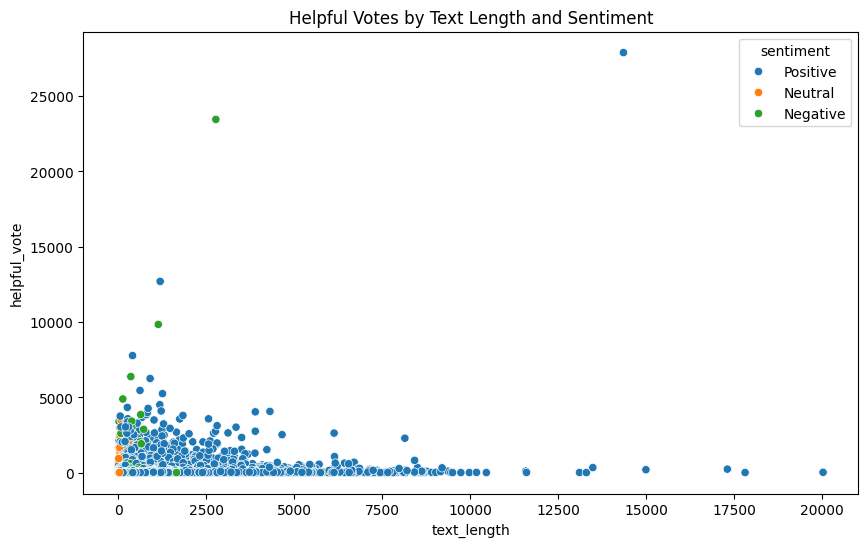

<ipython-input-19-337168d8f400>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sentiment_over_time = df.resample('M').polarity.mean()


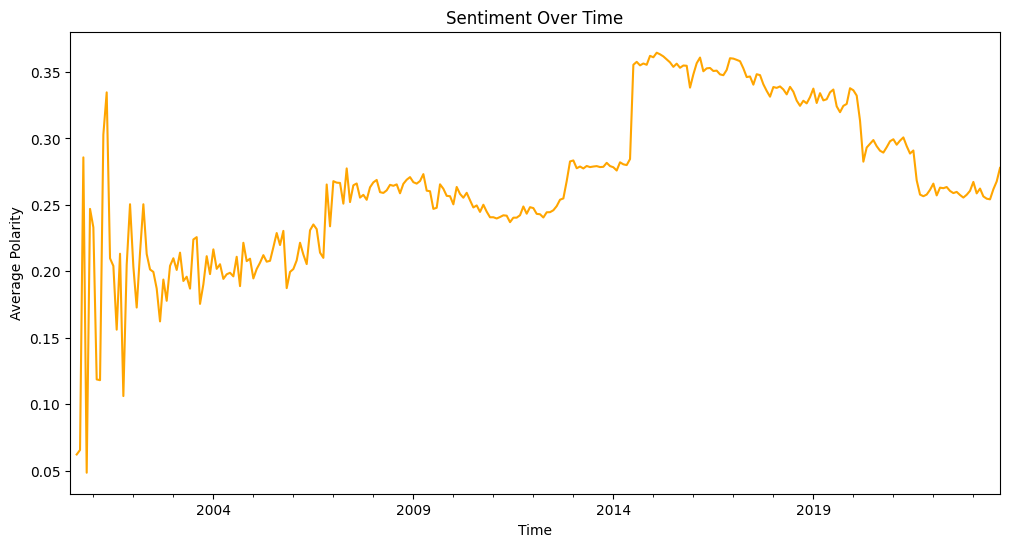

Overall sentiment polarity mean: 0.30762326043829746
Overall sentiment subjectivity mean: 0.5552326702585966
Sentiment counts:
 sentiment
Positive    17065255
Negative     2449911
Neutral      2125689
Name: count, dtype: int64
Top 20 n-grams:
               N-gram  Frequency
0         taste like     388855
1      great product     333850
2           year old     279555
3   highly recommend     273480
4        taste great     270722
5         taste good     242574
6          month old     241722
7         work great     223564
8           easy use     218632
9           car seat     193334
10      good quality     188916
11       great price     182613
12      great flavor     179835
13   would recommend     179247
14       really good     178532
15         work well     171265
16       really like     169983
17       great taste     163307
18       much better     160980
19        first time     149473


In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['polarity'], kde=True, color='skyblue')
plt.title('Polarity Distribution of Reviews')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['subjectivity'], kde=True, color='salmon')
plt.title('Subjectivity Distribution of Reviews')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='text_length', data=df)
plt.title('Text Length by Sentiment')
plt.show()

stop_words = stopwords.words('english')
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words=stop_words)
ngrams = vectorizer.fit_transform(df['processed_text'])
sum_words = ngrams.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]

words_df = pd.DataFrame(words_freq, columns=['N-gram', 'Frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='N-gram', data=words_df)
plt.title('Top Bigrams and Trigrams in Reviews')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='helpful_vote', data=df)
plt.title('Helpful Votes by Sentiment')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='helpful_vote', hue='sentiment', data=df)
plt.title('Helpful Votes by Text Length and Sentiment')
plt.show()

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
sentiment_over_time = df.resample('M').polarity.mean()

plt.figure(figsize=(12, 6))
sentiment_over_time.plot(color='orange')
plt.title('Sentiment Over Time')
plt.xlabel('Time')
plt.ylabel('Average Polarity')
plt.show()


print("Overall sentiment polarity mean:", df['polarity'].mean())
print("Overall sentiment subjectivity mean:", df['subjectivity'].mean())
print("Sentiment counts:\n", df['sentiment'].value_counts())
print("Top 20 n-grams:\n", words_df)

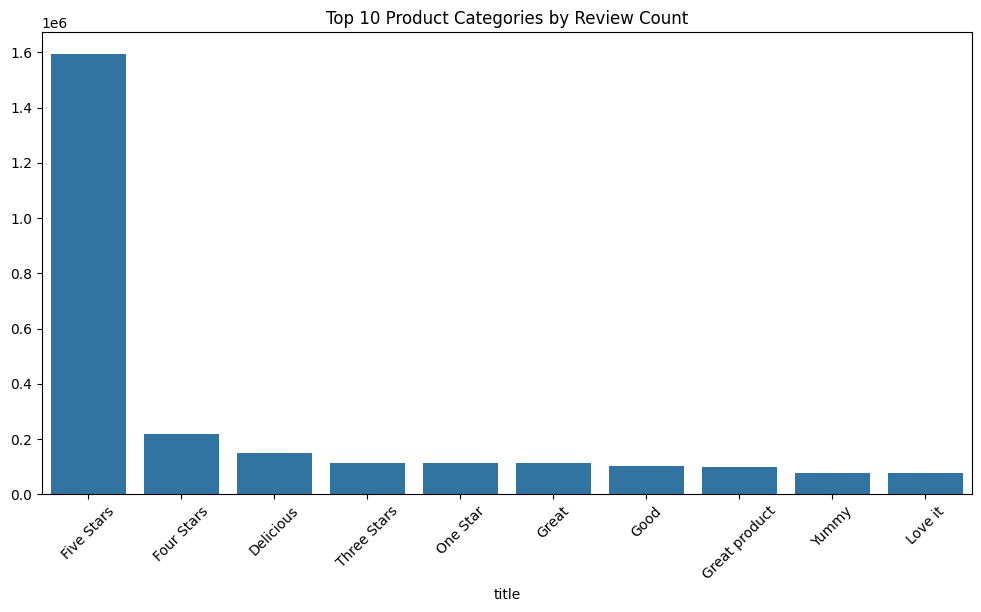

Top 10 product categories by review count:
 title
Five Stars       1593070
Four Stars        217120
Delicious         150878
Three Stars       113934
One Star          112616
Great             112187
Good              100795
Great product      99581
Yummy              77979
Love it            75887
Name: count, dtype: int64
Reviews mentioning loss or gains:
                                                             processed_text  \
timestamp                                                                    
2018-08-16 17:40:27.514  found yummy tea match tumbler lol seriously fa...   
2018-05-31 17:23:24.364  lancaster caramel used everywhere town vero be...   
2021-03-01 18:47:35.674  expecting apple butter texture disappointed pr...   
2022-12-08 02:30:56.982  advertised soft buttery homemade style caramel...   
2022-11-14 15:48:37.768  work fine keurig maker blend listed light roas...   

                         polarity  
timestamp                          
2018-08-16 17:40:27.

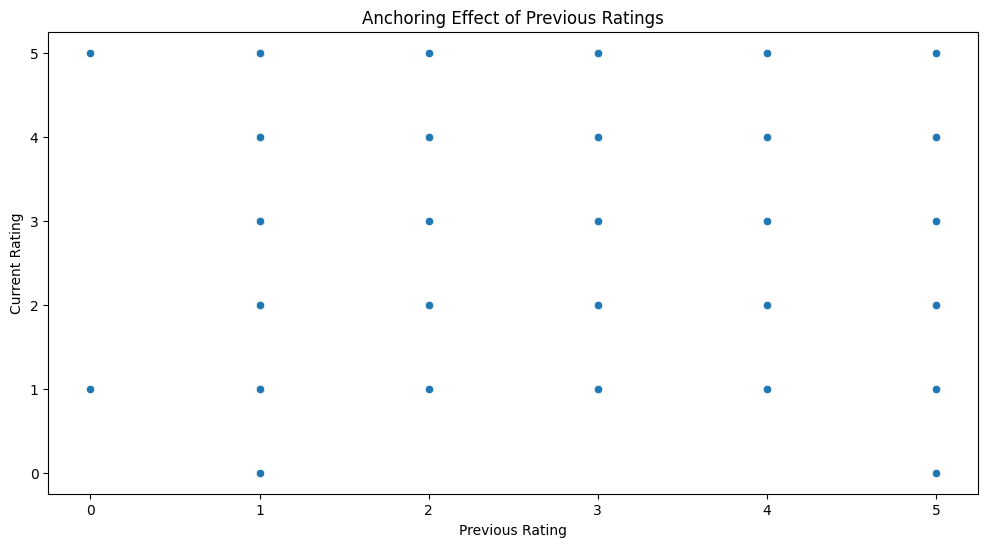

Correlation between previous and current ratings: 0.13591030600659854


<ipython-input-20-22fd5d479868>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = df['polarity'].resample('M').mean()


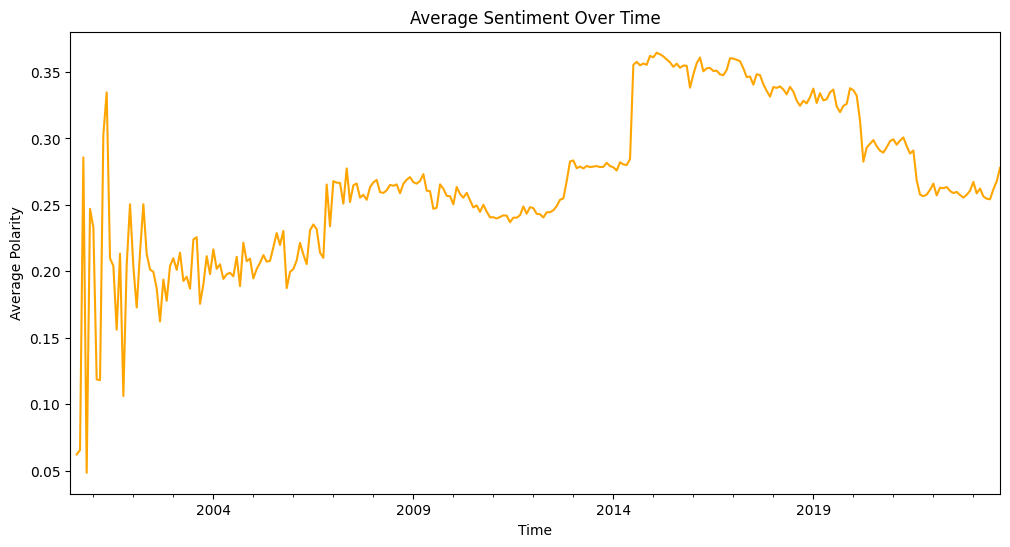

Average sentiment over time:
 timestamp
2000-06-30    0.240440
2000-07-31         NaN
2000-08-31    0.062292
2000-09-30    0.065668
2000-10-31    0.285734
                ...   
2023-05-31    0.254675
2023-06-30    0.254187
2023-07-31    0.261735
2023-08-31    0.267641
2023-09-30    0.277829
Freq: ME, Name: polarity, Length: 280, dtype: float64


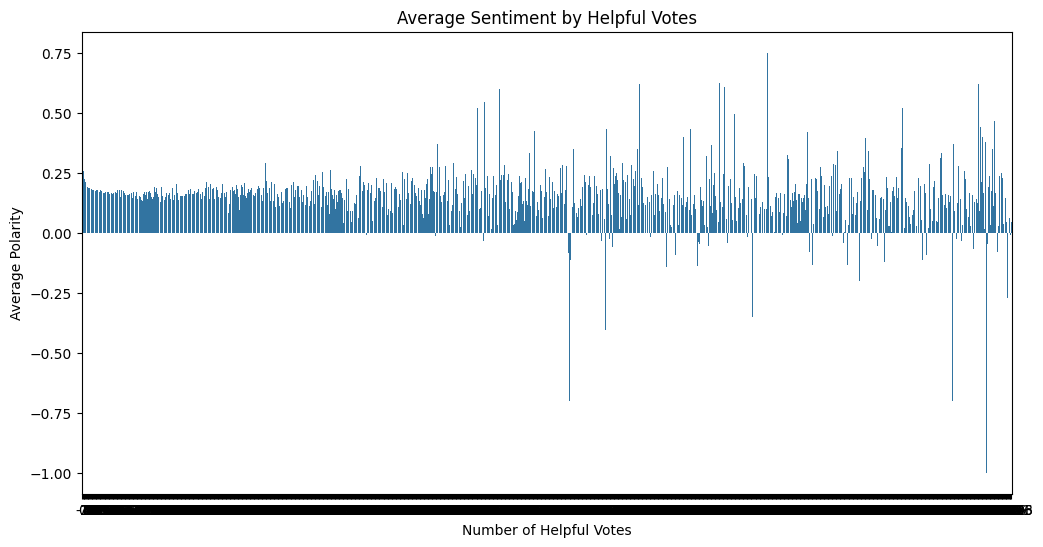

Average sentiment by helpful votes:
 helpful_vote
-1        0.533333
 0        0.331041
 1        0.258611
 2        0.225683
 3        0.210881
            ...   
 7769     0.005303
 9836    -0.029613
 12691    0.061111
 23446   -0.009105
 27883    0.045121
Name: polarity, Length: 1160, dtype: float64


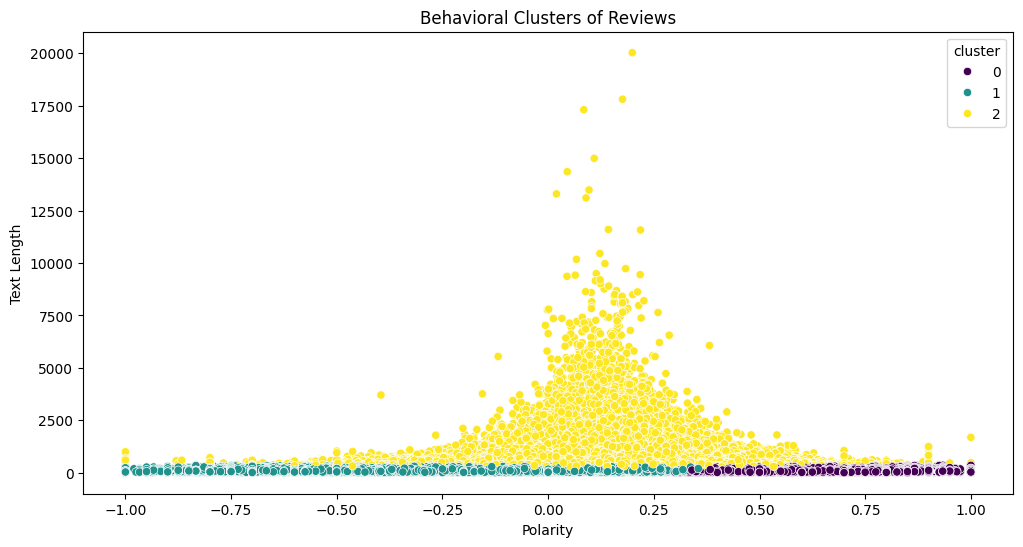

Cluster distribution:
 cluster
0    10135197
1    10091528
2     1414130
Name: count, dtype: int64


In [ ]:
category_distribution = df['title'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values)
plt.title('Top 10 Product Categories by Review Count')
plt.xticks(rotation=45)
plt.show()
print("Top 10 product categories by review count:\n", category_distribution)


loss_gains = df[df['processed_text'].str.contains("lose|lost|disappointed|gain|satisfied", case=False)]
print("Reviews mentioning loss or gains:\n", loss_gains[['processed_text', 'polarity']].head())


df['previous_rating'] = df['rating'].shift(1)
anchoring_effect = df[['previous_rating', 'rating']].dropna()
plt.figure(figsize=(12, 6))
sns.scatterplot(data=anchoring_effect, x='previous_rating', y='rating')
plt.title('Anchoring Effect of Previous Ratings')
plt.xlabel('Previous Rating')
plt.ylabel('Current Rating')
plt.show()
print("Correlation between previous and current ratings:", anchoring_effect.corr().iloc[0, 1])


df = df.reset_index()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
monthly_sentiment = df['polarity'].resample('M').mean()
plt.figure(figsize=(12, 6))
monthly_sentiment.plot(color='orange')
plt.title('Average Sentiment Over Time')
plt.xlabel('Time')
plt.ylabel('Average Polarity')
plt.show()
print("Average sentiment over time:\n", monthly_sentiment)

helpful_votes_sentiment = df.groupby('helpful_vote')['polarity'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=helpful_votes_sentiment.index, y=helpful_votes_sentiment.values)
plt.title('Average Sentiment by Helpful Votes')
plt.xlabel('Number of Helpful Votes')
plt.ylabel('Average Polarity')
plt.show()
print("Average sentiment by helpful votes:\n", helpful_votes_sentiment)

features = df[['polarity', 'text_length']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(features_scaled)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='polarity', y='text_length', hue='cluster', data=df, palette='viridis')
plt.title('Behavioral Clusters of Reviews')
plt.xlabel('Polarity')
plt.ylabel('Text Length')
plt.show()

cluster_counts = df['cluster'].value_counts()
print("Cluster distribution:\n", cluster_counts)

In [ ]:
df.to_csv('/content/drive/MyDrive/Data Science Project/Checkpoint 4.csv', index=False)